In [1]:
import pandas as pd

## 🩺 Predicting heart disease using machine learning

## 📑 Problem Definition

- In a statement,

- Given clinical parameters about a patient, can we predict whether or not they have heart disease?


## 📝 Features
- This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).






## 💾 Create data dictionary
- 1.age - age in years
- 2.sex - (1 = male; 0 = female)
- 3.cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease
- 4.trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
- 5.chol - serum cholestoral in mg/dl
- serum = LDL + HDL + .2 * triglycerides
- above 200 is cause for concern
- 6.fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- '>126' mg/dL signals diabetes
- 7.restecg - resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
    - can range from mild symptoms to severe problems
      - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
- 8.thalach - maximum heart rate achieved
- 9.exang - exercise induced angina (1 = yes; 0 = no)
- 10.oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
- 11.slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
- 12.ca - number of major vessels (0-3) colored by flourosopy
     - colored vessel means the doctor can see the blood passing through
     - the more blood movement the better (no clots)
- 13.thal - thalium stress result
     - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when excercising
- 14.target - have disease or not (1=yes, 0=no) (= the predicted attribute)

# Import relevant libraries

In [68]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [12]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [13]:
data = pd.read_csv(r"C:\Users\samadhan ashok kale\Downloads\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
ML models different algorithm models to check arrucary of

Logistic Regression
Naive Bayes
Random Forest Classifier
Extreme Gradient Boost
K-Nearest Neighbour
Decision Tree
Support Vector Machine

SyntaxError: invalid syntax (Temp/ipykernel_19568/2973815369.py, line 1)

In [20]:
p=data.target.value_counts()
p

1    526
0    499
Name: target, dtype: int64

- We have 165 person with heart disease and 138 person without heart disease, so our problem is balanced.
- Looks like the perfect dataset!!! No null values :-)

In [23]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [24]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

## Is sex is related to heart disease?

In [26]:
data["sex"] = data["sex"].map({0:"Female", 1:"Male"})
data.groupby(data["sex"])["target"].agg(["value_counts"])

value_counts
sex    target              
Female 1                226
       0                 86
Male   0                413
       1                300

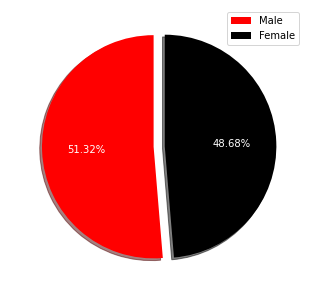

In [27]:
sex = ["Male", "Female"]
values = data["target"].value_counts()
color = ["#FF0000", "#000000"]

plt.figure(figsize = (5, 7))
plt.pie(values, labels = sex, colors = color, explode = (0.1, 0), textprops = {"color":"w"}, autopct = "%.2f%%", shadow = True, startangle = 90)

plt.legend();

- Ratio of Male to Female is approx 1:1

- Insight:Males are having more heart disease as compared to females.

## Relation between Sex and Slope

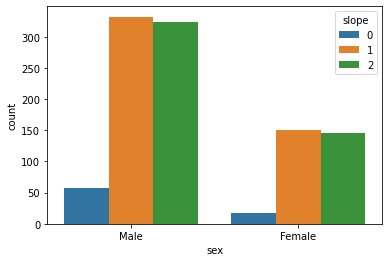

In [28]:
sns.countplot(x = data["sex"], hue = data["slope"]);

- The slope value is higher in the case of Males

## How blood pressure is related with heart disease?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


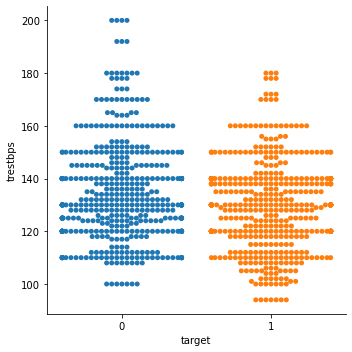

In [29]:
sns.catplot(x="target",y="trestbps",data=data,kind="swarm")

- Insight: People having blood pressure between 120 - 140 are more likely to have a heart disease.

## How chest pain is related with heart disease ?

In [30]:
data.groupby(data["cp"])["target"].agg(["value_counts"])

value_counts
cp target              
0  0                375
   1                122
1  1                134
   0                 33
2  1                219
   0                 65
3  1                 51
   0                 26

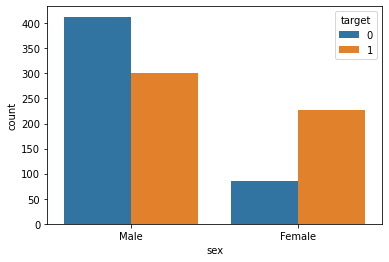

In [31]:
sns.countplot(x = "sex",data = data, hue = "target");

## Chest Pain Classification Sex-wise

- chest pain: 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart 
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease

In [32]:
data.groupby("sex")["cp"].agg(["value_counts"])

value_counts
sex    cp              
Female 0            133
       2            109
       1             57
       3             13
Male   0            364
       2            175
       1            110
       3             64

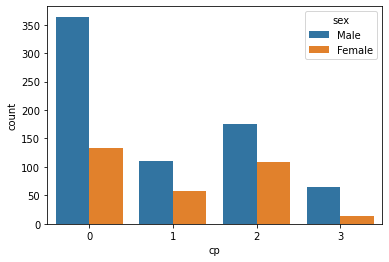

In [33]:
sns.countplot(x = "cp", data = data, hue = "sex");

- Insight: Most of the peoples are having Typical angina chest pain.

## Relation between Chest Pain vs Target

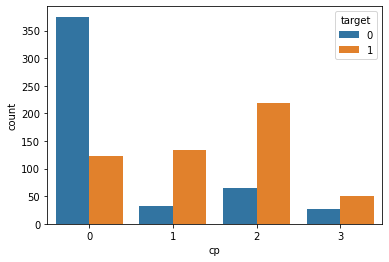

In [34]:
sns.countplot(x = "cp", data = data, hue = "target");

- Insight: Peoples having Typical angina chest pain are more likely to have heart disease.

## Do Males and Females absorb glucose differently?

In [35]:
data.groupby(["sex"])["fbs"].agg(["value_counts"])

value_counts
sex    fbs              
Female 0             270
       1              42
Male   0             602
       1             111

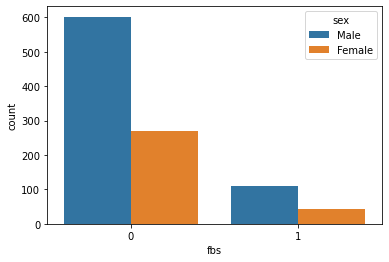

In [36]:
sns.countplot(x = "fbs", data = data, hue = "sex");

- Females have lower fasting glucose than Males

## Electrocardiographic relation with heart disease

- Value 0: normal

- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

- Value 2: showing probable or definite left ventricular hypertrophy

In [38]:
data.groupby(data["restecg"])["target"].agg(["count"])

,count
restecg,
0,497
1,513
2,15


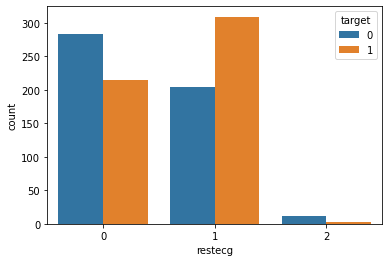

In [39]:
sns.countplot(x = "restecg", data = data, hue = "target");

- Insight:The persons having ST-T wave abnormality resting electrocardiographic are more likely to have heart disease

## Thalach(maximum heart rate achieved) is related with target?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


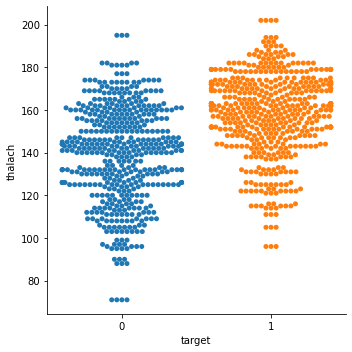

In [40]:
sns.catplot(x="target",y="thalach",data=data,kind="swarm")

- Insight: people having heart rate between 140 to 180 are more likely to have a heart disease.

In [42]:
data.groupby(["sex"])["restecg"].agg(["value_counts"])

value_counts
sex    restecg              
Female 1                 157
       0                 144
       2                  11
Male   1                 356
       0                 353
       2                   4

## How does gender affect angina?

In [43]:
data.groupby(["sex"])["exang"].agg(["value_counts"])

value_counts
sex    exang              
Female 0               238
       1                74
Male   0               442
       1               271

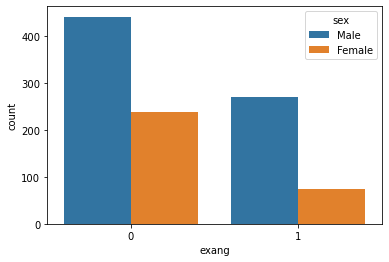

In [44]:
sns.countplot(x = "exang", data = data, hue = "sex");

- Although the prevalence of angina in females is increasing, Females are less likely than Males to undergo invasive management of coronary disease

## How agina is related with heart disease?

In [45]:
data.groupby(["target"])["exang"].agg(["value_counts"])

value_counts
target exang              
0      1               274
       0               225
1      0               455
       1                71

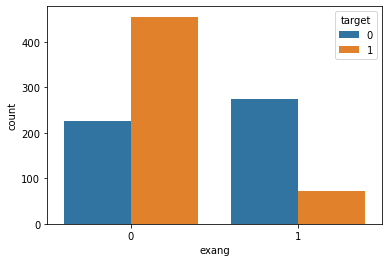

In [46]:
sns.countplot(x = "exang", data = data, hue = "target");

- Insight :The persons having Exercise induced angina are less likely to have heart disease

## Is gender a risk factor for Coronary Artery Disease?

In [47]:
data.groupby(["sex"])["ca"].agg(["value_counts"])

value_counts
sex    ca              
Female 0            204
       1             49
       2             45
       3             14
Male   0            374
       1            177
       2             89
       3             55
       4             18

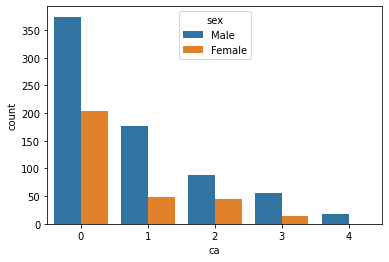

In [48]:
sns.countplot(x = "ca", data = data, hue = "sex");

- Males have a higher propensity of developing Coronary Artery Disease (CAD) than Females

## Thalassemia Classification

- value 0: Null¶
- Value 1: normal blood flow

- Value 2: fixed defect (no blood flow in some part of the heart)

- Value 3: reversible defect (a blood flow is observed but it is not normal)

## How Thalassemia is related with heart disease.

In [50]:
data.groupby(["thal"])["target"].agg(["value_counts"])

value_counts
thal target              
0    0                  4
     1                  3
1    0                 43
     1                 21
2    1                412
     0                132
3    0                320
     1                 90

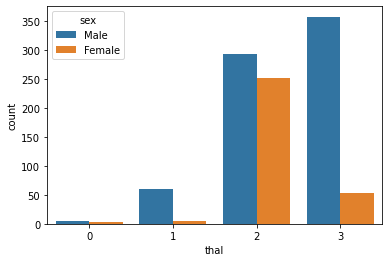

In [51]:
sns.countplot(x = "thal", data = data, hue = "sex");

## Is Thalassemia more common in Males or Females?

In [52]:
data.groupby(["sex"])["thal"].agg(["value_counts"])

value_counts
sex    thal              
Female 2              252
       3               53
       1                4
       0                3
Male   3              357
       2              292
       1               60
       0                4

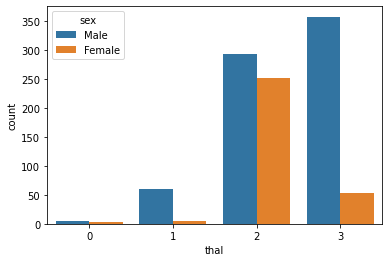

In [53]:
sns.countplot(x = "thal", data = data, hue = "sex");

- Thalassemia can affect both Male and Female
- Male patients are more frequently affected than Females

## How many '0' and '1' we have in our Dependent Variable

In [54]:
data["target"].agg(["value_counts"])

,value_counts
1,526
0,499


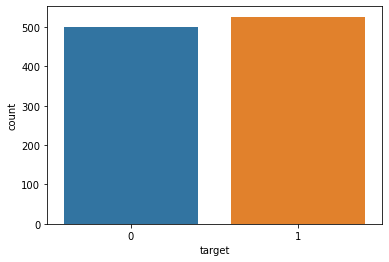

In [55]:
sns.countplot(x = data["target"]);

- The ratio between 1 and 0 is much less than 1.5 which indicates that the target feature is not imbalanced

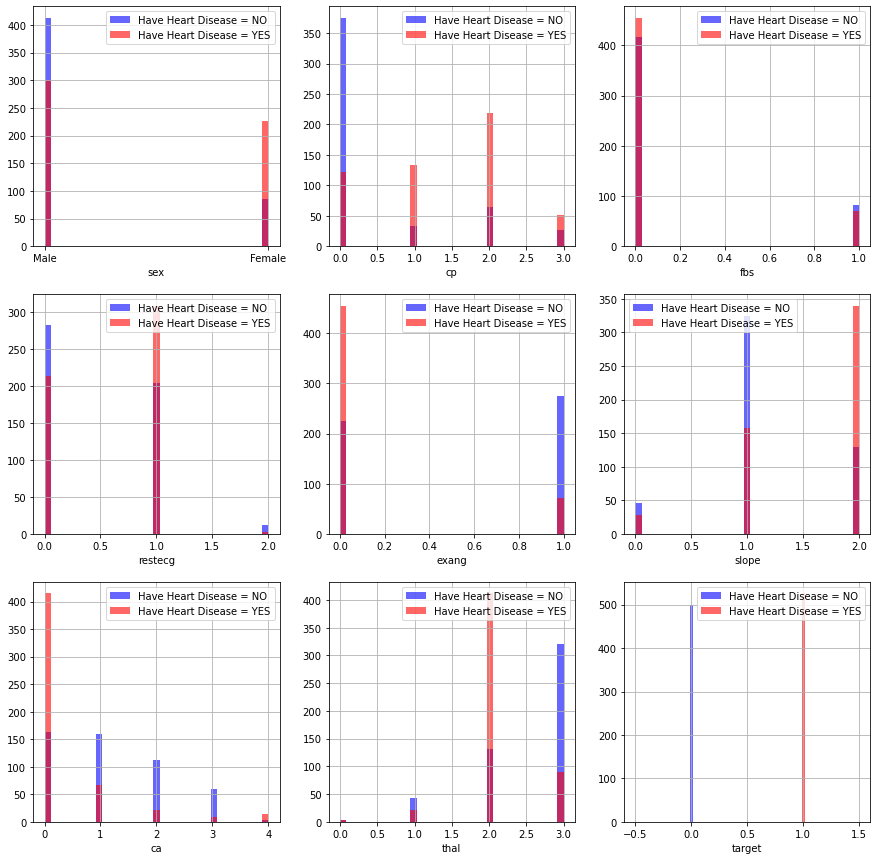

In [56]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

📌 Notes:
- cp {Chest Pain} : People with cp equl to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.
- restecg {resting electrocardiographic results} : People with value 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.
- exang {exercise induced angina} : People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1 (Yes ==> exercice induced angina)
- slope {the slope of the peak exercise ST segment} : People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
- ca {number of major vessels (0-3) colored by flourosopy} : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.
- thal {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.

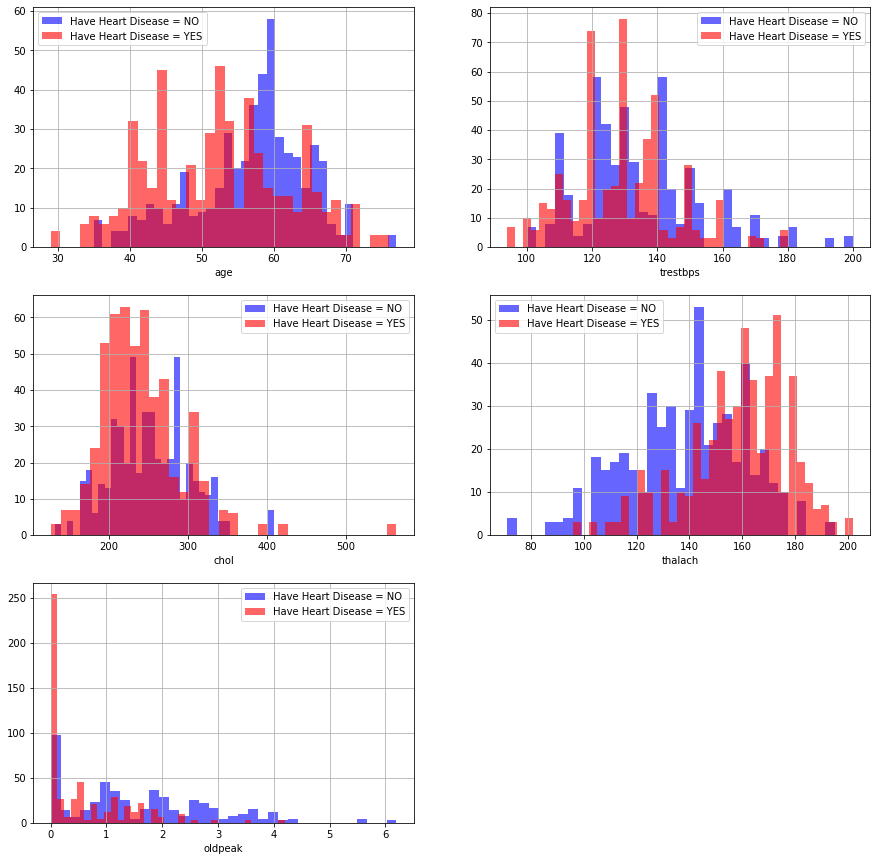

In [57]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

📌 Notes:
- trestbps : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
- chol {serum cholestoral in mg/dl} : above 200 is cause for concern.
- thalach {maximum heart rate achieved} : People how acheived a maximum more than 140 are more likely to have heart disease.
- oldpeak ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

## Data preparation

- lable encoding

In [58]:
print (data["sex"].unique())

#Replacing Female as 0 and Male as 1 in sex column in the dataset

data["sex"] = data["sex"].map({"Female":0, "Male":1})
print (data["sex"].unique())

['Male' 'Female']
[1 0]


- Detecting Outliers

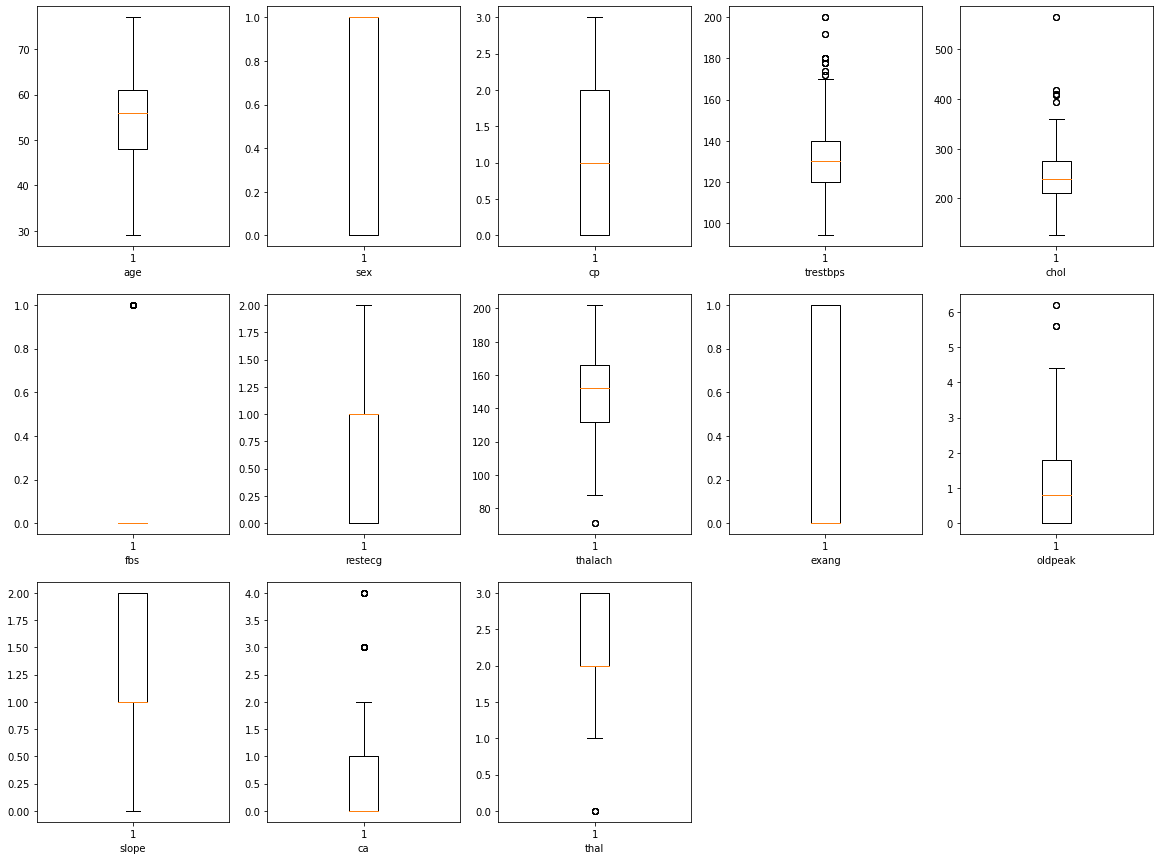

In [59]:
col = 1
plt.figure(figsize = (20, 15))
for i in data.columns:
    if col < 14:
        plt.subplot(3, 5, col)
        plt.boxplot(data[i])
        plt.xlabel(i)
    col = col + 1

we can see that there are many outliers in the column trestbps,chol,ca,thalach,oldpeak so i will try to remove these outliers.

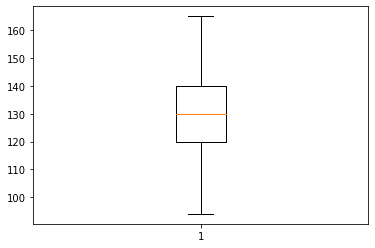

In [60]:
#Removing outliers from the column trestbps
q3=data["trestbps"].quantile(q=0.75)
q1=data["trestbps"].quantile(q=0.25)
IQR=q3-q1
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
k=data[data["trestbps"]>IQR_upper_limit]
data=data[data["trestbps"]<IQR_upper_limit]
plt.boxplot(data["trestbps"]);

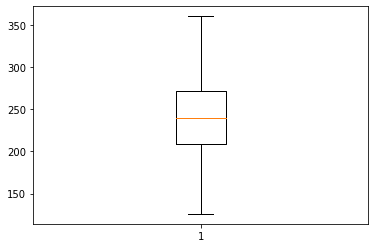

In [61]:
#Removing outliers from the column chol
q3=data["chol"].quantile(q=0.75)
q1=data["chol"].quantile(q=0.25)
IQR=q3-q1
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
k=data[data["chol"]>IQR_upper_limit]
data=data[data["chol"]<IQR_upper_limit]
plt.boxplot(data["chol"]);

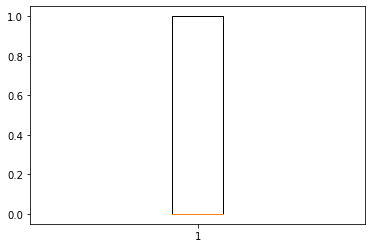

In [62]:
#Removing outliers from the column ca:l
q3=data["ca"].quantile(q=0.75)
q1=data["ca"].quantile(q=0.25)
IQR=q3-q1
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
k=data[data["ca"]>IQR_upper_limit]
data=data[data["ca"]<IQR_upper_limit]
plt.boxplot(data["ca"]);

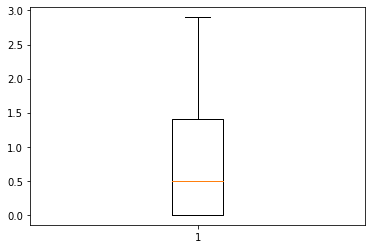

In [63]:
#Removing outliers from the column oldpeak
q3=data["oldpeak"].quantile(q=0.75)
q1=data["oldpeak"].quantile(q=0.25)
IQR=q3-q1
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
k=data[data["oldpeak"]>IQR_upper_limit]
data=data[data["oldpeak"]<IQR_upper_limit]
plt.boxplot(data["oldpeak"]);

Now the data is cleaned and i will checkh the co-relation between the featues.

### Correlation Heatmap

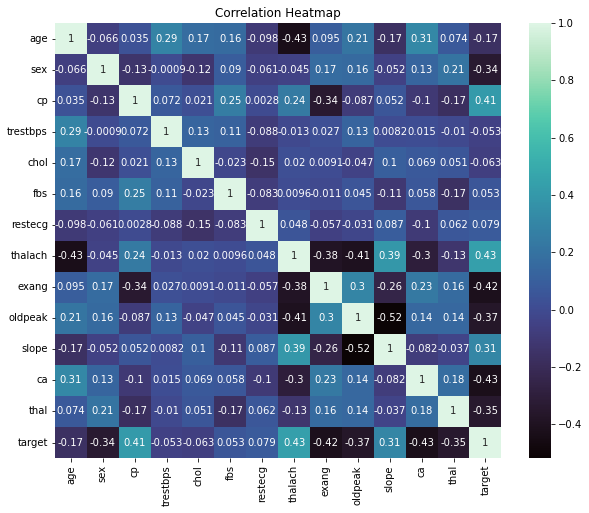

In [64]:
x = data.corr()

plt.figure(figsize = (10, 8))
sns.heatmap(x, annot = True, cmap = "mako")
plt.title("Correlation Heatmap");

From the above we can see that the columns are not co-related with tearget so we will take all the columns for model.

## Modelling and Evaluation.

Define the Dependent and the Independent Variables

In [96]:
x = data.drop(columns = ["target"])
y = data["target"]

Scaling of Data using MinMaxScaler

In [69]:
x_scaled = MinMaxScaler()
x_scaled = x_scaled.fit_transform(x)

Training the Data

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 1234)

# LOGISTIC REGRESSION

In [71]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
lr_acc = accuracy_score(y_test, y_pred)
print(lr_acc)
f1 = f1_score(y_test, y_pred)
print(f1)
mat = confusion_matrix(y_test, y_pred)
print(mat)

0.8551724137931035
0.8877005347593583
[[41 18]
 [ 3 83]]


# DECISION TREE CLASSIFIER

In [72]:
DT= DecisionTreeClassifier()
parameters = {
'criterion' : ['gini', 'entropy'],
'min_samples_split' : [2,4,6,8],
'min_samples_leaf': [1,2,3,4,5],
}
from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV(estimator=DT, param_grid=parameters,
                          cv=5, scoring="accuracy", n_jobs =-1)
grid_search_cv.fit(x_scaled, y)
grid_search_cv.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 4}

In [73]:
y_pred = grid_search_cv.predict(x_test)
dt_accuracy = accuracy_score(y_pred,y_test)
print(dt_accuracy)
mat = confusion_matrix(y_test,y_pred)
print(mat)
print(classification_report(y_test,y_pred))

1.0
[[59  0]
 [ 0 86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        86

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145



# RANDOM FOREST CLASSIFIER

In [74]:
RF= RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)
rf_accuracy = accuracy_score(y_test,y_pred)
print(rf_accuracy)
c_mat= confusion_matrix(y_test,y_pred)
print(c_mat)
print(classification_report(y_test,y_pred))

1.0
[[59  0]
 [ 0 86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        86

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145



# ADA BOOST CLASSIFIER

In [75]:
AB= AdaBoostClassifier()
AB.fit(x_train,y_train)
y_pred = AB.predict(x_test)
ab_accuracy = accuracy_score(y_test,y_pred)
print(ab_accuracy)
confusion_mat= confusion_matrix(y_test,y_pred)
print(confusion_mat)
print(classification_report(y_test,y_pred))

0.9103448275862069
[[53  6]
 [ 7 79]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        59
           1       0.93      0.92      0.92        86

    accuracy                           0.91       145
   macro avg       0.91      0.91      0.91       145
weighted avg       0.91      0.91      0.91       145



# SUPPORT VECTOR CLASSIFIER

In [76]:
model= SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
sv_accuracy = accuracy_score(y_test,y_pred)
print(sv_accuracy)
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)
print(classification_report(y_test,y_pred))

0.8620689655172413
[[42 17]
 [ 3 83]]
              precision    recall  f1-score   support

           0       0.93      0.71      0.81        59
           1       0.83      0.97      0.89        86

    accuracy                           0.86       145
   macro avg       0.88      0.84      0.85       145
weighted avg       0.87      0.86      0.86       145



# K NEAREST NEIGHBOR

In [77]:
knn =  KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
kn_accuracy = accuracy_score(y_test,y_pred)
print(kn_accuracy)
print(classification_report(y_test,y_pred))

0.8620689655172413
              precision    recall  f1-score   support

           0       0.88      0.76      0.82        59
           1       0.85      0.93      0.89        86

    accuracy                           0.86       145
   macro avg       0.87      0.85      0.85       145
weighted avg       0.86      0.86      0.86       145



- After implementing 8 models, this section will compare machine learning models.

In [84]:
Evaluation = pd.DataFrame({'Model': ['Logistic Regression', "Decision Tree", 'Random Forest',
                                     "Ada boost classifier","Support Vector Machine","K-nearest neighbor"], 
                          'Accuracy': [lr_acc*100, dt_accuracy*100,rf_accuracy*100,ab_accuracy*100,
                                      sv_accuracy*100,
                                     kn_accuracy*100]})
Evaluation

,Model,Accuracy
0,Logistic Regression,85.517241
1,Decision Tree,100.000000
2,Random Forest,100.000000
3,Ada boost classifier,91.034483
4,Support Vector Machine,86.206897
5,K-nearest neighbor,86.206897


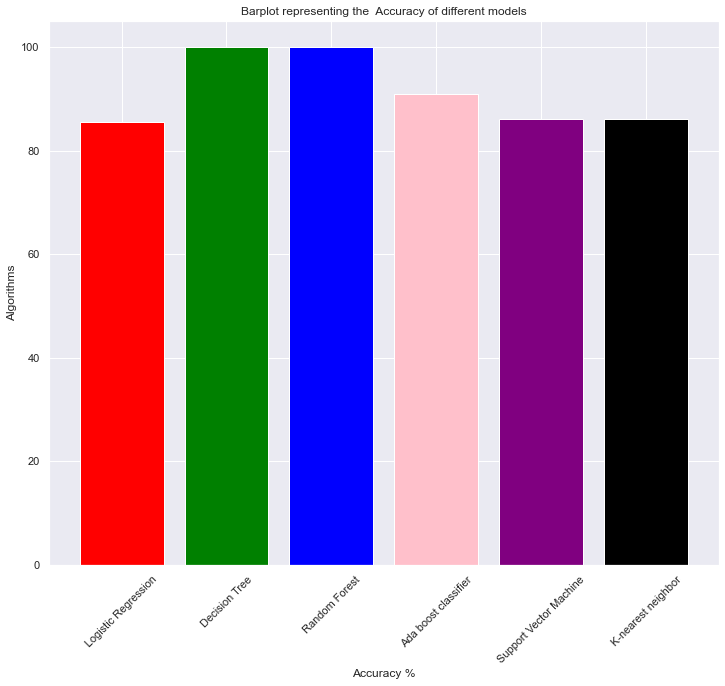

In [85]:
colors = ['red','green','blue','pink','purple','black','orange',"yellow"]
plt.figure(figsize=(12,10))
plt.title("Barplot representing the  Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(Evaluation['Model'],Evaluation['Accuracy'],color = colors)
plt.xticks(rotation = 45)
plt.show()


#  Conclusion

We have found the hidden data insights using visualization and compare different machine learning models based on accuracy and it is found that Decision Tree and Random Forest work efficiently for this data set with accuracy 100%

In [97]:
x = data.drop(columns = ["target"])
y = data["target"]

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    train_size = 0.8,
                                                    stratify = y,
                                                    random_state = 1234) 

In [99]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 1234)

In [100]:
model = classifier.fit(x_train, y_train) 

In [101]:
model.score(x_test, y_test)

0.9793103448275862

In [102]:
model.score(x_train, y_train)

1.0

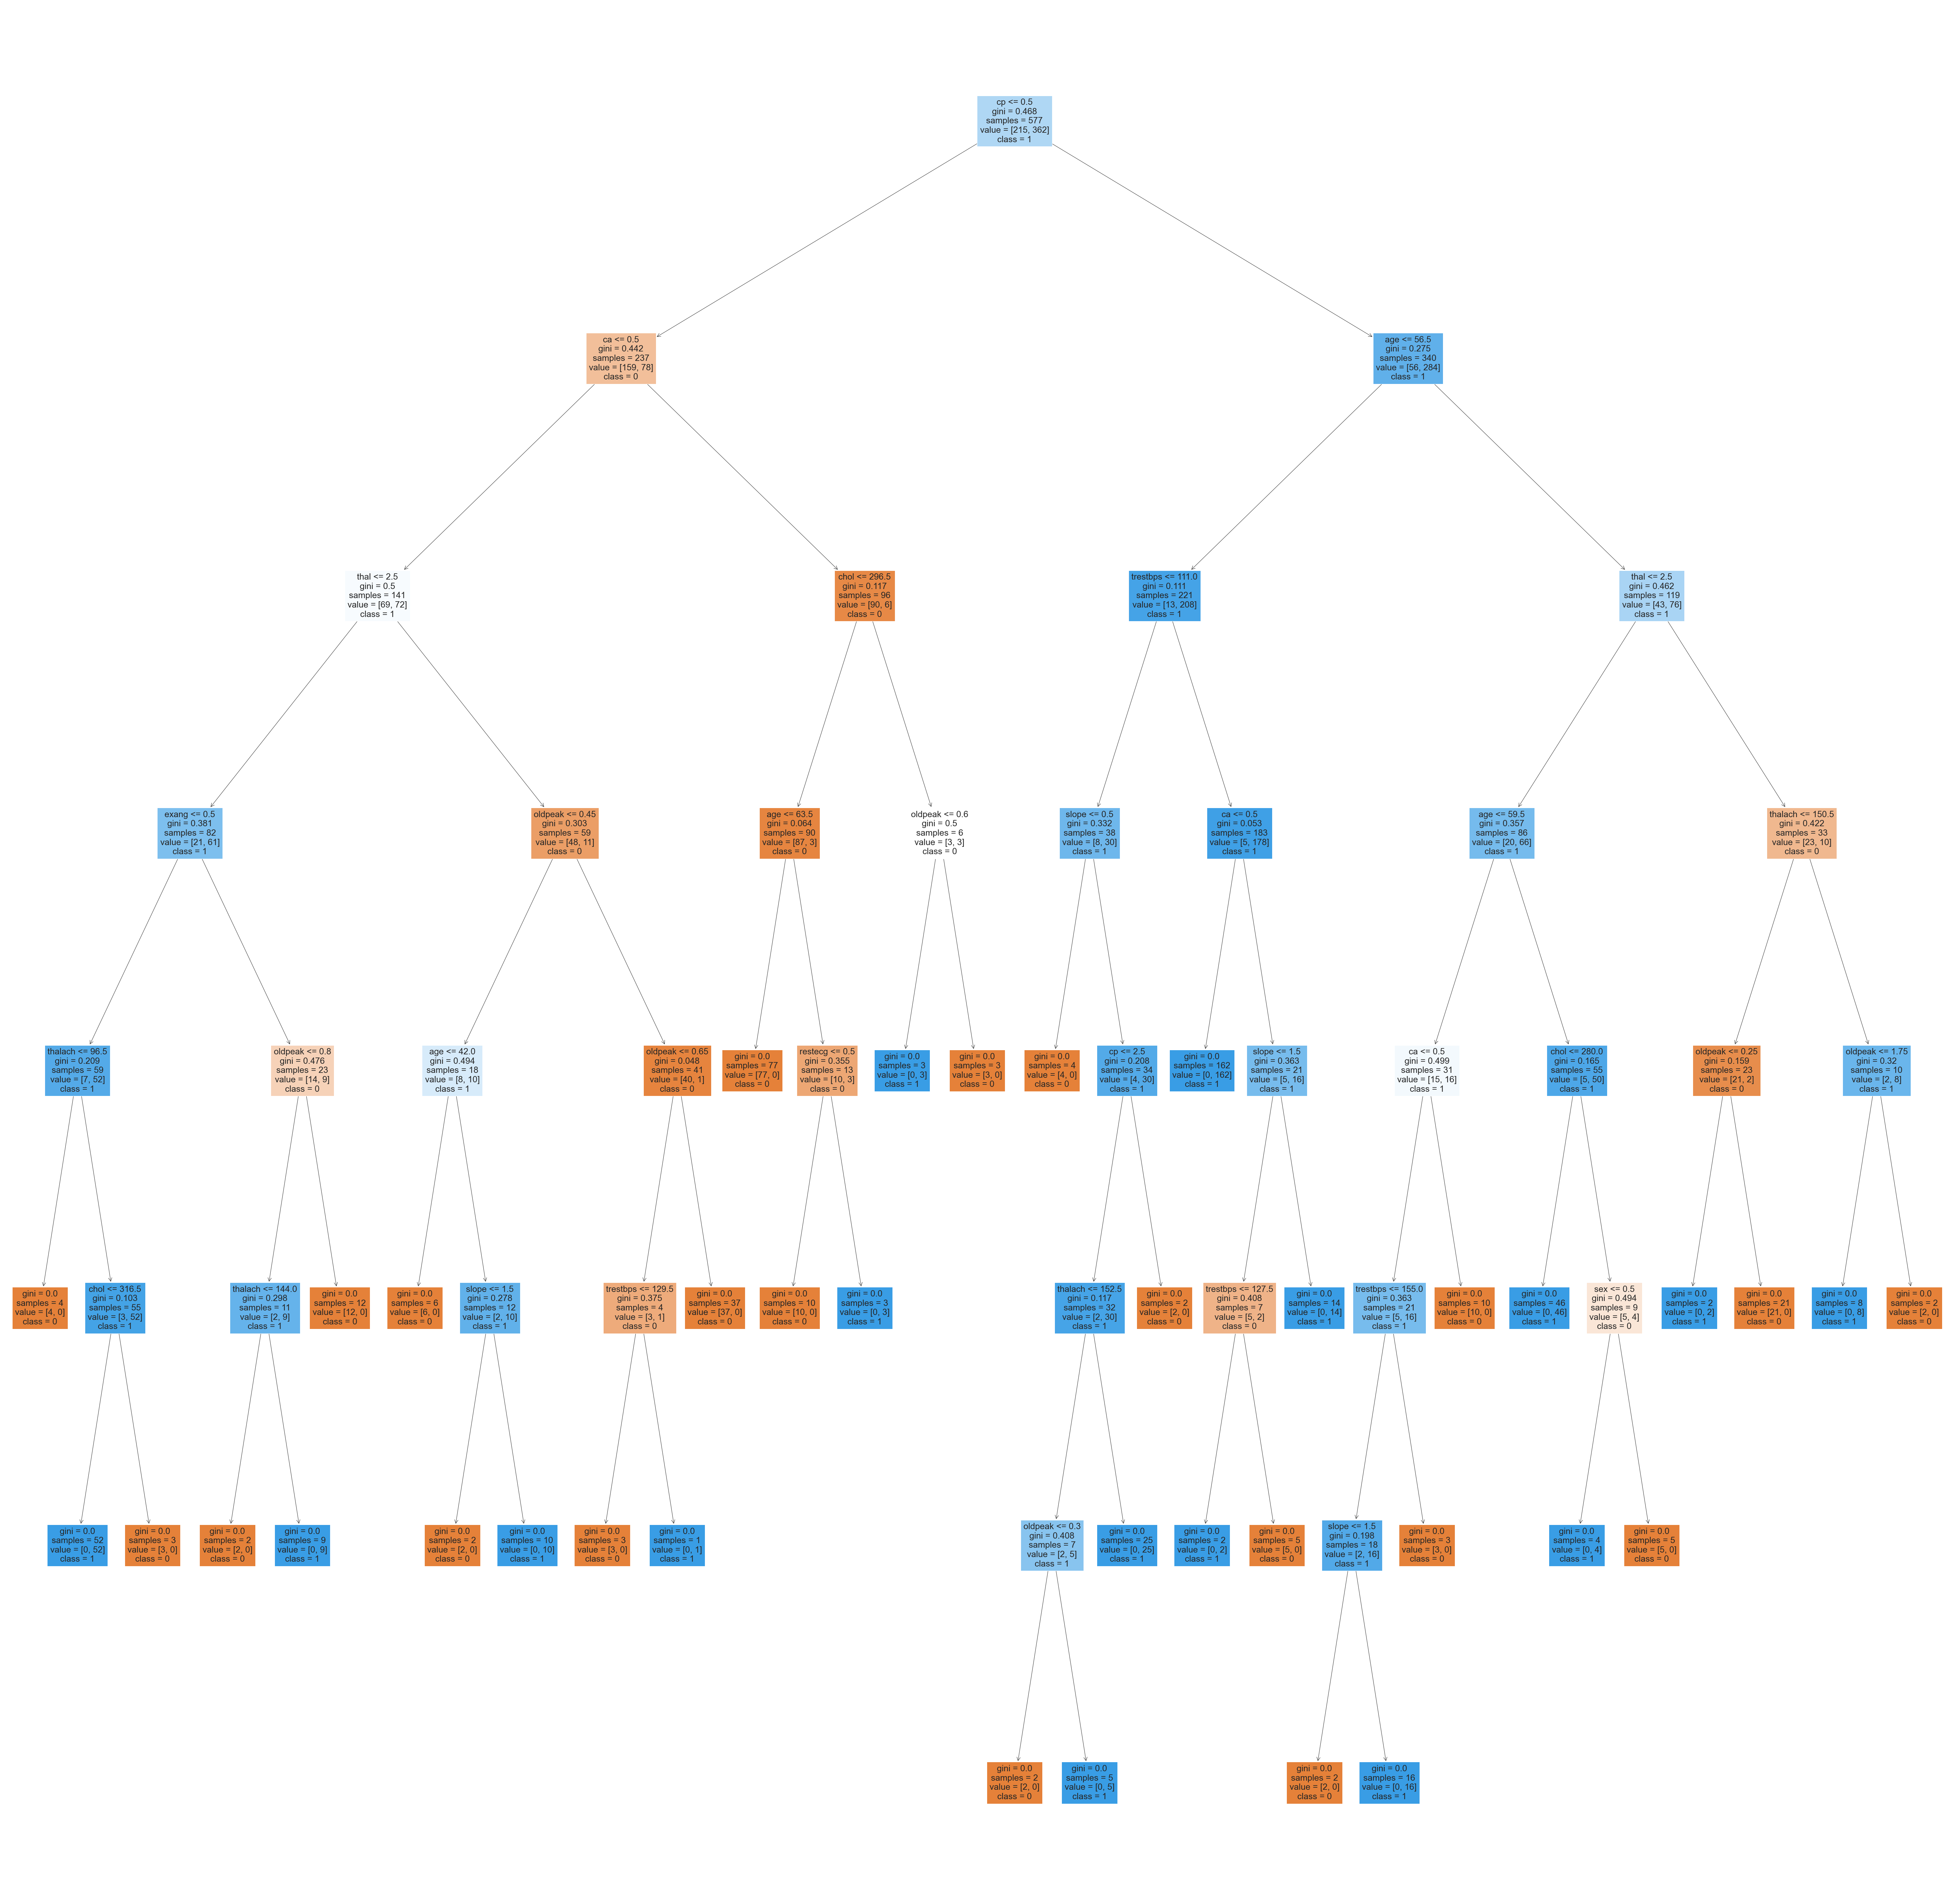

In [103]:
from sklearn import tree
plt.figure(figsize = (100,100))
tree.plot_tree(model, 
                   feature_names = list(x.columns), 
                   class_names = ['0','1','2'],
                   filled = True);

In [104]:
model.feature_importances_

array([0.10016154, 0.01647465, 0.2775366 , 0.0390432 , 0.0473328 ,
       0.        , 0.01710829, 0.06642232, 0.0294631 , 0.103429  ,
       0.0638442 , 0.12200067, 0.11718363])

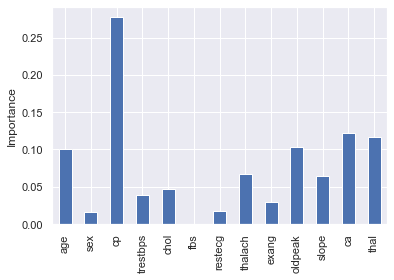

In [105]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = x.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance');

In [106]:
grid = {'max_depth': [2, 4, 6,8,10,12],
         'min_samples_split': [2, 3,4],
         'min_samples_leaf': range(1,2)}

In [107]:
model.score(x_test, y_test) # test score

0.9793103448275862

In [108]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state = 1234)
gcv = GridSearchCV(estimator = classifier, param_grid = grid)
gcv.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': range(1, 2),
                         'min_samples_split': [2, 3, 4]})

In [109]:
gcv.best_estimator_

DecisionTreeClassifier(max_depth=10, random_state=1234)

In [110]:
model.score(x_train, y_train)

1.0

In [111]:
model.score(x_test, y_test)

0.9793103448275862

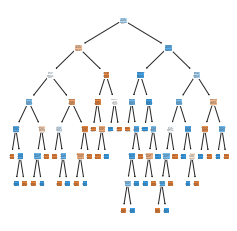

In [112]:
plt.figure(figsize = (4,4))
tree.plot_tree(model, 
                   feature_names = list(x.columns), 
                   class_names = ['0','1','2'],
                   filled = True);

In [113]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## arrange daya into features matrix

In [114]:
features=['age','trestbps','chol']
x=data.loc[:,features].values

In [115]:
x

array([[ 70, 145, 174],
       [ 61, 148, 203],
       [ 58, 100, 248],
       ...,
       [ 47, 110, 275],
       [ 50, 110, 254],
       [ 54, 120, 188]], dtype=int64)

In [116]:
y=data.target
y

2       0
3       0
5       1
7       0
8       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 722, dtype: int64

## standardize data

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
# Apply Standardization to features matrix X
x = data.loc[:, features].values
x = StandardScaler().fit_transform(x)
x

array([[ 1.8773641 ,  1.14244144, -1.48611632],
       [ 0.8818433 ,  1.34791584, -0.83004178],
       [ 0.55000303, -1.93967451,  0.18800493],
       ...,
       [-0.66674462, -1.25475986,  0.79883296],
       [-0.33490435, -1.25475986,  0.32374449],
       [ 0.10754934, -0.5698452 , -1.16939068]])

## Plot Data to Estimate Number of Clusters

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


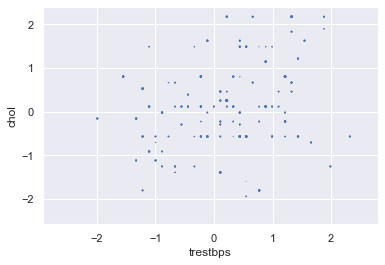

In [119]:
# Plot 
pd.DataFrame(x, columns = features).plot.scatter('age','trestbps','chol' )

# Add labels
plt.xlabel('trestbps');
plt.ylabel('chol');


## Kmeans clustering

In [120]:
from sklearn.cluster import KMeans

In [121]:
# Make an instance of KMeans with 3 clusters
kmeans = KMeans(n_clusters=2, random_state=1)

# Fit only on a features matrix
kmeans.fit(x) #training 

KMeans(n_clusters=2, random_state=1)

In [122]:
# Get labels and cluster centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [123]:
labels

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [124]:
centroids

array([[ 0.58627464,  0.5416098 ,  0.49124245],
       [-0.61284799, -0.56615869, -0.5135084 ]])

In [125]:
centroids[:,0]

array([ 0.58627464, -0.61284799])

In [126]:
kmeans.cluster_centers_

array([[ 0.58627464,  0.5416098 ,  0.49124245],
       [-0.61284799, -0.56615869, -0.5135084 ]])

In [127]:
kmeans.inertia_

1503.0657670361481

In [128]:
from sklearn import metrics

In [129]:
metrics.accuracy_score(y,kmeans.labels_)

0.5734072022160664

In [130]:
kmeans.labels_

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [131]:
x = pd.DataFrame(x, columns = features)

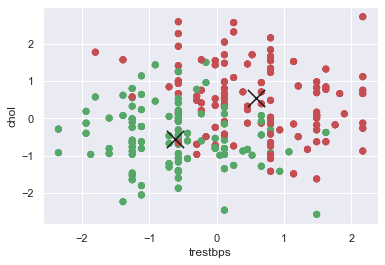

In [132]:
colormap = np.array(['r', 'g'])
plt.scatter(x['trestbps'], x['chol'], c=colormap[labels])
plt.scatter(centroids[:,0], centroids[:,1], s = 300, marker = 'x', c = 'k')

plt.xlabel('trestbps')
plt.ylabel('chol');